# Results and Plots for BoW Classifier

*Marco Tallone*\
*Scientific and Data-Intensive Computing (SDIC) - UniTS*\
*Computer Vision and Pattern Recognition (CVPR) Exam Project*\
*2024/2025*

The objective of this notebook is to produce the numeric results and the plots needed for the final report of the BoW classifier.\
Please, refer to the `bow-classifier.ipynb` notebook for a detailed description of the code and a step-by-step explanation of the project.

## Imports and Dataset Loading

In [1]:
# import modules and utility functions
from utils import *

# Constants
DATASET_DIR = "../datasets"
TRAIN_DIR = os.path.join(DATASET_DIR, "train")
TEST_DIR = os.path.join(DATASET_DIR, "test")

# Load data
train_images, train_labels, classes = load_images(TRAIN_DIR)
test_images,  test_labels, 	_       = load_images(TEST_DIR)

# Data information
print(f"Number of classes: {len(classes)}")
print(f"Number of training images: {len(train_images)}")
print(f"Number of test images: {len(test_images)}")

Imported libraries:
	- Numpy version: 1.26.4
	- OpenCV version: 4.10.0
	- SciKit-Learn version: 1.5.2

Imported functions:
	- load_images()
	- get_histogram()
	- get_tfidf()
	- get_pyramid_histogram()
	- pyramid_kernel()


Loading images:   0%|          | 0/15 [00:00<?, ?it/s]

Loading images:   0%|          | 0/15 [00:00<?, ?it/s]

Number of classes: 15
Number of training images: 1500
Number of test images: 2985


## Numeric Results

### Feature Extraction, Clustering and Image Representation

In [2]:
# Initialize SIFT detector and descriptor
FEATURES = 500
sift = cv2.SIFT_create(FEATURES)

# Compute descriptors from detected keypoints
descriptors1 = []
n_descriptors1 = []
for image in tqdm.tqdm(
	train_images, 
	desc="Computing descriptors from detected keypoints", 
	leave=False
):
	_, image_descriptors = sift.detectAndCompute(image, None)
	n_descriptors1.append(len(image_descriptors))
	descriptors1.extend(image_descriptors)

descriptors1 = np.array(descriptors1)

# Compute descriptors from dense grid of keypoints
descriptors2 = []
n_descriptors2 = []
spacing = 8 # pixels
for image in tqdm.tqdm(
	train_images, 
	desc="Computing descriptors from grid of keypoints", 
	leave=False
):
	height, width = image.shape[:2]
	keypoints = [
		cv2.KeyPoint(x, y, spacing) 
	 	for y in range(spacing, height, spacing) 
	  	for x in range(spacing, width, spacing)
	]
	_, image_descriptors = sift.compute(image, keypoints)
	n_descriptors2.append(len(image_descriptors))
	descriptors2.extend(image_descriptors)
	
descriptors2 = np.array(descriptors2)	

print(f"Number of detected SIFT descriptors: {len(descriptors1)}")
print(f"Number of grid SIFT descriptors: {len(descriptors2)}")

Computing descriptors from detected keypoints:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing descriptors from grid of keypoints:   0%|          | 0/1500 [00:00<?, ?it/s]

Number of detected SIFT descriptors: 593006
Number of grid SIFT descriptors: 1482434


In [3]:
# Random subset of descriptors
np.random.seed(3)
n_samples1 = 10000
n_samples2 = 25000

sample_indices1 = np.random.choice(len(descriptors1), n_samples1, replace=False)
sample_descriptors1 = descriptors1[sample_indices1]

sample_indices2 = np.random.choice(len(descriptors2), n_samples2, replace=False)
sample_descriptors2 = descriptors2[sample_indices2]

# Number of clusters
K = 400

# Clustering
kmeans1 = KMeans(n_clusters=K, random_state=42)
kmeans1.fit(sample_descriptors1)

kmeans2 = KMeans(n_clusters=K, random_state=42)
kmeans2.fit(sample_descriptors2)

KMeans(n_clusters=700, random_state=42)

In [4]:
# Compute histograms representations for train and test images
train_histograms1 = []
test_histograms1 = []
train_histograms2 = []
test_histograms2 = []

# Compute histograms for all training and test images
for image in tqdm.tqdm(
	train_images, 
	desc="Computing histograms for training images", 
	leave=False
):
	train_histograms1.append(get_histogram(image, sift, kmeans1, K))
	train_histograms2.append(get_histogram(image, sift, kmeans2, K))
train_histograms1 = np.array(train_histograms1)
train_histograms2 = np.array(train_histograms2)
 
for image in tqdm.tqdm(
	test_images, 
	desc="Computing histograms for test images", 
	leave=False
):
	test_histograms1.append(get_histogram(image, sift, kmeans1, K))
	test_histograms2.append(get_histogram(image, sift, kmeans2, K))
test_histograms1 = np.array(test_histograms1)
test_histograms2 = np.array(test_histograms2)

Computing histograms for training images:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing histograms for test images:   0%|          | 0/2985 [00:00<?, ?it/s]

In [5]:
# Compute TD-IDF representations for train and test images
train_tfidf1 = get_tfidf(train_images, sift, kmeans1, K)
test_tfidf1 = get_tfidf(test_images, sift, kmeans1, K)
train_tfidf2 = get_tfidf(train_images, sift, kmeans2, K)
test_tfidf2 = get_tfidf(test_images, sift, kmeans2, K)

Computing TF-IDF:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing TF-IDF:   0%|          | 0/2985 [00:00<?, ?it/s]

Computing TF-IDF:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing TF-IDF:   0%|          | 0/2985 [00:00<?, ?it/s]

In [6]:
# Set pyramid levels
LEVELS = range(0, 3)

# Compute histograms for all training and test images for pyramid matching kernel
train_histograms_pmk = []
test_histograms_pmk = []
for image in tqdm.tqdm(train_images, desc="Computing histograms for training images", leave=False):
	train_histograms_pmk.append(get_pyramid_histogram(image, LEVELS, sift, kmeans2, K))
train_histograms_pmk = np.array(train_histograms_pmk)
 
for image in tqdm.tqdm(test_images, desc="Computing histograms for test images", leave=False):
	test_histograms_pmk.append(get_pyramid_histogram(image, LEVELS, sift, kmeans2, K))
test_histograms_pmk = np.array(test_histograms_pmk)

Computing histograms for training images:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing histograms for test images:   0%|          | 0/2985 [00:00<?, ?it/s]

### Dummy

In [7]:
# Dummy classifier
dummy1 = DummyClassifier(strategy="most_frequent")
dummy1.fit(test_histograms1, test_labels)
dummy_predictions1 = dummy1.predict(test_histograms1)
dummy_score1 = dummy1.score(test_histograms1, test_labels)

dummy2 = DummyClassifier(strategy="most_frequent")
dummy2.fit(test_histograms2, test_labels)
dummy_predictions2 = dummy2.predict(test_histograms2)
dummy_score2 = dummy2.score(test_histograms2, test_labels)

dummy3 = DummyClassifier(strategy="most_frequent")
dummy3.fit(test_tfidf1, test_labels)
dummy_predictions3 = dummy3.predict(test_tfidf1)
dummy_score3 = dummy3.score(test_tfidf1, test_labels)

dummy4 = DummyClassifier(strategy="most_frequent")
dummy4.fit(test_tfidf2, test_labels)
dummy_predictions4 = dummy4.predict(test_tfidf2)
dummy_score4 = dummy4.score(test_tfidf2, test_labels)

print(f"Dummy accuracy (SIFT - histograms): {dummy_score1 * 100:.2f}%")
print(f"Dummy accuracy (grid - histograms): {dummy_score2 * 100:.2f}%")
print(f"Dummy accuracy (SIFT - TF-IDF): {dummy_score3 * 100:.2f}%")
print(f"Dummy accuracy (grid - TF-IDF): {dummy_score4 * 100:.2f}%")

Dummy accuracy (SIFT - histograms): 10.39%
Dummy accuracy (grid - histograms): 10.39%
Dummy accuracy (SIFT - TF-IDF): 10.39%
Dummy accuracy (grid - TF-IDF): 10.39%


### KNN

In [8]:
# Single neighbors KNN
one_knn1 = KNeighborsClassifier(n_neighbors=1)
one_knn1.fit(train_histograms1, train_labels)
one_knn_predictions1 = one_knn1.predict(test_histograms1)
one_knn_accuracy1 = accuracy_score(test_labels, one_knn_predictions1)

one_knn2 = KNeighborsClassifier(n_neighbors=1)
one_knn2.fit(train_histograms2, train_labels)
one_knn_predictions2 = one_knn2.predict(test_histograms2)
one_knn_accuracy2 = accuracy_score(test_labels, one_knn_predictions2)

one_knn3 = KNeighborsClassifier(n_neighbors=1)
one_knn3.fit(train_tfidf1, train_labels)
one_knn_predictions3 = one_knn3.predict(test_tfidf1)
one_knn_accuracy3 = accuracy_score(test_labels, one_knn_predictions3)

one_knn4 = KNeighborsClassifier(n_neighbors=1)
one_knn4.fit(train_tfidf2, train_labels)
one_knn_predictions4 = one_knn4.predict(test_tfidf2)
one_knn_accuracy4 = accuracy_score(test_labels, one_knn_predictions4)

print(f"1-NN accuracy (SIFT - histograms): {one_knn_accuracy1 * 100:.2f}%")
print(f"1-NN accuracy (grid - histograms): {one_knn_accuracy2 * 100:.2f}%")
print(f"1-NN accuracy (SIFT - TF-IDF): {one_knn_accuracy3 * 100:.2f}%")
print(f"1-NN accuracy (grid - TF-IDF): {one_knn_accuracy4 * 100:.2f}%")

# Multi neighbors KNN (find best k and assess performance)
k_values = range(1, 51)
accuracies1 = []
accuracies2 = []
accuracies3 = []
accuracies4 = []
for k_ in tqdm.tqdm(k_values, desc="Testing k-NN values", leave=False):

	# Train k-NN classifier
	knn1 = KNeighborsClassifier(n_neighbors=k_)
	knn1.fit(train_histograms1, train_labels)
	knn2 = KNeighborsClassifier(n_neighbors=k_)
	knn2.fit(train_histograms2, train_labels)
	knn3 = KNeighborsClassifier(n_neighbors=k_)
	knn3.fit(train_tfidf1, train_labels)
	knn4 = KNeighborsClassifier(n_neighbors=k_)
	knn4.fit(train_tfidf2, train_labels)

	# Predict labels for test set
	predictions1 = knn1.predict(test_histograms1)
	predictions2 = knn2.predict(test_histograms2)
	predictions3 = knn3.predict(test_tfidf1)
	predictions4 = knn4.predict(test_tfidf2)

	# Calculate accuracy
	accuracy1 = accuracy_score(test_labels, predictions1)
	accuracy2 = accuracy_score(test_labels, predictions2)
	accuracy3 = accuracy_score(test_labels, predictions3)
	accuracy4 = accuracy_score(test_labels, predictions4)
 
	accuracies1.append(accuracy1)
	accuracies2.append(accuracy2)
	accuracies3.append(accuracy3)
	accuracies4.append(accuracy4)

# Best k
best_k1 = k_values[np.argmax(accuracies1)]
knn1 = KNeighborsClassifier(n_neighbors=best_k1)
knn1.fit(train_histograms1, train_labels)
predictions1 = knn1.predict(test_histograms1)
accuracy1 = accuracy_score(test_labels, predictions1)

best_k2 = k_values[np.argmax(accuracies2)]
knn2 = KNeighborsClassifier(n_neighbors=best_k2)
knn2.fit(train_histograms2, train_labels)
predictions2 = knn2.predict(test_histograms2)
accuracy2 = accuracy_score(test_labels, predictions2)

best_k3 = k_values[np.argmax(accuracies3)]
knn3 = KNeighborsClassifier(n_neighbors=best_k3)
knn3.fit(train_tfidf1, train_labels)
predictions3 = knn3.predict(test_tfidf1)
accuracy3 = accuracy_score(test_labels, predictions3)

best_k4 = k_values[np.argmax(accuracies4)]
knn4 = KNeighborsClassifier(n_neighbors=best_k4)
knn4.fit(train_tfidf2, train_labels)
predictions4 = knn4.predict(test_tfidf2)
accuracy4 = accuracy_score(test_labels, predictions4)

print(f"k-NN accuracy (SIFT - histograms): {accuracy1 * 100:.2f}% with k={best_k1}")
print(f"k-NN accuracy (grid - histograms): {accuracy2 * 100:.2f}% with k={best_k2}")
print(f"k-NN accuracy (SIFT - TF-IDF): {accuracy3 * 100:.2f}% with k={best_k3}")
print(f"k-NN accuracy (grid - TF-IDF): {accuracy4 * 100:.2f}% with k={best_k4}")

1-NN accuracy (SIFT - histograms): 31.52%
1-NN accuracy (grid - histograms): 32.76%
1-NN accuracy (SIFT - TF-IDF): 29.88%
1-NN accuracy (grid - TF-IDF): 21.68%


Testing k-NN values:   0%|          | 0/50 [00:00<?, ?it/s]

k-NN accuracy (SIFT - histograms): 36.05% with k=13
k-NN accuracy (grid - histograms): 37.89% with k=10
k-NN accuracy (SIFT - TF-IDF): 34.20% with k=9
k-NN accuracy (grid - TF-IDF): 27.20% with k=9


### SVM

In [9]:
# SVMs classifiers
rbf_SVMs1 = []
rbf_SVMs2 = []
rbf_SVMs3 = []
rbf_SVMs4 = []

chi_SVMs1 = []
chi_SVMs2 = []
chi_SVMs3 = []
chi_SVMs4 = []

pmk_SVMs = []

# Precompute Gram matrix for training and testing
chi_train_gram1 = chi2_kernel(train_histograms1, train_histograms1, gamma=0.5)
chi_test_gram1 = chi2_kernel(test_histograms1, train_histograms1, gamma=0.5)
chi_train_gram2 = chi2_kernel(train_histograms2, train_histograms2, gamma=0.5)
chi_test_gram2 = chi2_kernel(test_histograms2, train_histograms2, gamma=0.5)
chi_train_gram3 = chi2_kernel(train_tfidf1, train_tfidf1, gamma=0.5)
chi_test_gram3 = chi2_kernel(test_tfidf1, train_tfidf1, gamma=0.5)
chi_train_gram4 = chi2_kernel(train_tfidf2, train_tfidf2, gamma=0.5)
chi_test_gram4 = chi2_kernel(test_tfidf2, train_tfidf2, gamma=0.5)

pmk_train_gram = pyramid_kernel(train_histograms_pmk, train_histograms_pmk)
pmk_test_gram = pyramid_kernel(test_histograms_pmk, train_histograms_pmk)

for target_label in tqdm.tqdm(set(train_labels), desc="Training SVMs", leave=False):

	# Change labels to {1, -1}
	one_vs_all_labels = [1 if label == target_label else -1 for label in train_labels]
	
	# SVM with RBF kernel
	svm1 = SVC(probability=True, C=1.0, kernel='rbf')
	svm1.fit(train_histograms1, one_vs_all_labels)
	rbf_SVMs1.append(svm1)
	svm2 = SVC(probability=True, C=1.0, kernel='rbf')
	svm2.fit(train_histograms2, one_vs_all_labels)
	rbf_SVMs2.append(svm2)
	svm3 = SVC(probability=True, C=1.0, kernel='rbf')
	svm3.fit(train_tfidf1, one_vs_all_labels)
	rbf_SVMs3.append(svm3)
	svm4 = SVC(probability=True, C=1.0, kernel='rbf')
	svm4.fit(train_tfidf2, one_vs_all_labels)
	rbf_SVMs4.append(svm4)

	# SVM with chi2 kernel
	svm1 = SVC(probability=True, C=1.0, kernel='precomputed')
	svm1.fit(chi_train_gram1, one_vs_all_labels)
	chi_SVMs1.append(svm1)
	svm2 = SVC(probability=True, C=1.0, kernel='precomputed')
	svm2.fit(chi_train_gram2, one_vs_all_labels)
	chi_SVMs2.append(svm2)
	svm3 = SVC(probability=True, C=1.0, kernel='precomputed')
	svm3.fit(chi_train_gram3, one_vs_all_labels)
	chi_SVMs3.append(svm3)
	svm4 = SVC(probability=True, C=1.0, kernel='precomputed')
	svm4.fit(chi_train_gram4, one_vs_all_labels)
	chi_SVMs4.append(svm4)

	# SVM with pyramid matching kernel
	svm = SVC(probability=True, C=1.0, kernel='precomputed')
	svm.fit(pmk_train_gram, one_vs_all_labels)
	pmk_SVMs.append(svm)
	
# Predictions
predictions = np.array([svm.decision_function(test_histograms1) for svm in rbf_SVMs1])
rbf_predictions1 = np.argmax(predictions, axis=0)
predictions = np.array([svm.decision_function(test_histograms2) for svm in rbf_SVMs2])
rbf_predictions2 = np.argmax(predictions, axis=0)
predictions = np.array([svm.decision_function(test_tfidf1) for svm in rbf_SVMs3])
rbf_predictions3 = np.argmax(predictions, axis=0)
predictions = np.array([svm.decision_function(test_tfidf2) for svm in rbf_SVMs4])
rbf_predictions4 = np.argmax(predictions, axis=0)

predictions = np.array([svm.decision_function(chi_test_gram1) for svm in chi_SVMs1])
chi_predictions1 = np.argmax(predictions, axis=0)
predictions = np.array([svm.decision_function(chi_test_gram2) for svm in chi_SVMs2])
chi_predictions2 = np.argmax(predictions, axis=0)
predictions = np.array([svm.decision_function(chi_test_gram3) for svm in chi_SVMs3])
chi_predictions3 = np.argmax(predictions, axis=0)
predictions = np.array([svm.decision_function(chi_test_gram4) for svm in chi_SVMs4])
chi_predictions4 = np.argmax(predictions, axis=0)

predictions = np.array([svm.decision_function(pmk_test_gram) for svm in pmk_SVMs])
pmk_predictions = np.argmax(predictions, axis=0)

# Accuracies
rbf_accuracy1 = accuracy_score(test_labels, rbf_predictions1)
rbf_accuracy2 = accuracy_score(test_labels, rbf_predictions2)
rbf_accuracy3 = accuracy_score(test_labels, rbf_predictions3)
rbf_accuracy4 = accuracy_score(test_labels, rbf_predictions4)

chi_accuracy1 = accuracy_score(test_labels, chi_predictions1)
chi_accuracy2 = accuracy_score(test_labels, chi_predictions2)
chi_accuracy3 = accuracy_score(test_labels, chi_predictions3)
chi_accuracy4 = accuracy_score(test_labels, chi_predictions4)

pmk_accuracy = accuracy_score(test_labels, pmk_predictions)

print(f"SVM accuracy (RBF - SIFT - histograms): {rbf_accuracy1 * 100:.2f}%")
print(f"SVM accuracy (RBF - grid - histograms): {rbf_accuracy2 * 100:.2f}%")
print(f"SVM accuracy (RBF - SIFT - TF-IDF): {rbf_accuracy3 * 100:.2f}%")
print(f"SVM accuracy (RBF - grid - TF-IDF): {rbf_accuracy4 * 100:.2f}%")

print(f"SVM accuracy (chi2 - SIFT - histograms): {chi_accuracy1 * 100:.2f}%")
print(f"SVM accuracy (chi2 - grid - histograms): {chi_accuracy2 * 100:.2f}%")
print(f"SVM accuracy (chi2 - SIFT - TF-IDF): {chi_accuracy3 * 100:.2f}%")
print(f"SVM accuracy (chi2 - grid - TF-IDF): {chi_accuracy4 * 100:.2f}%")

print(f"SVM accuracy (pyramid matching kernel): {pmk_accuracy * 100:.2f}%")

Computing kernel:   0%|          | 0/1500 [00:00<?, ?it/s]

Computing kernel:   0%|          | 0/2985 [00:00<?, ?it/s]

Training SVMs:   0%|          | 0/15 [00:00<?, ?it/s]

SVM accuracy (RBF - SIFT - histograms): 51.52%
SVM accuracy (RBF - grid - histograms): 50.65%
SVM accuracy (RBF - SIFT - TF-IDF): 50.69%
SVM accuracy (RBF - grid - TF-IDF): 42.35%
SVM accuracy (chi2 - SIFT - histograms): 52.33%
SVM accuracy (chi2 - grid - histograms): 49.72%
SVM accuracy (chi2 - SIFT - TF-IDF): 50.79%
SVM accuracy (chi2 - grid - TF-IDF): 44.72%
SVM accuracy (pyramid matching kernel): 75.81%


### Final Results

In [10]:
print(f"Dummy accuracy (SIFT - histograms):\t{dummy_score1 * 100:.2f}%")
print(f"Dummy accuracy (grid - histograms):\t{dummy_score2 * 100:.2f}%")
print(f"Dummy accuracy (SIFT - TF-IDF):\t\t{dummy_score3 * 100:.2f}%")
print(f"Dummy accuracy (grid - TF-IDF):\t\t{dummy_score4 * 100:.2f}%")
print(f"1-NN accuracy (SIFT - histograms):\t{one_knn_accuracy1 * 100:.2f}%")
print(f"1-NN accuracy (grid - histograms):\t{one_knn_accuracy2 * 100:.2f}%")
print(f"1-NN accuracy (SIFT - TF-IDF):\t\t{one_knn_accuracy3 * 100:.2f}%")
print(f"1-NN accuracy (grid - TF-IDF):\t\t{one_knn_accuracy4 * 100:.2f}%")
print(f"k-NN accuracy (SIFT - histograms):\t{accuracy1 * 100:.2f}% with k={best_k1}")
print(f"k-NN accuracy (grid - histograms):\t{accuracy2 * 100:.2f}% with k={best_k2}")
print(f"k-NN accuracy (SIFT - TF-IDF):\t\t{accuracy3 * 100:.2f}% with k={best_k3}")
print(f"k-NN accuracy (grid - TF-IDF):\t\t{accuracy4 * 100:.2f}% with k={best_k4}")
print(f"SVM accuracy (RBF - SIFT - histograms):\t{rbf_accuracy1 * 100:.2f}%")
print(f"SVM accuracy (RBF - grid - histograms):\t{rbf_accuracy2 * 100:.2f}%")
print(f"SVM accuracy (RBF - SIFT - TF-IDF):\t{rbf_accuracy3 * 100:.2f}%")
print(f"SVM accuracy (RBF - grid - TF-IDF):\t{rbf_accuracy4 * 100:.2f}%")
print(f"SVM accuracy (chi2 - SIFT - histograms):{chi_accuracy1 * 100:.2f}%")
print(f"SVM accuracy (chi2 - grid - histograms):{chi_accuracy2 * 100:.2f}%")
print(f"SVM accuracy (chi2 - SIFT - TF-IDF):\t{chi_accuracy3 * 100:.2f}%")
print(f"SVM accuracy (chi2 - grid - TF-IDF):\t{chi_accuracy4 * 100:.2f}%")
print(f"SVM accuracy (pyramid matching kernel):\t{pmk_accuracy * 100:.2f}%")

Dummy accuracy (SIFT - histograms):	10.39%
Dummy accuracy (grid - histograms):	10.39%
Dummy accuracy (SIFT - TF-IDF):		10.39%
Dummy accuracy (grid - TF-IDF):		10.39%
1-NN accuracy (SIFT - histograms):	31.52%
1-NN accuracy (grid - histograms):	32.76%
1-NN accuracy (SIFT - TF-IDF):		29.88%
1-NN accuracy (grid - TF-IDF):		21.68%
k-NN accuracy (SIFT - histograms):	36.05% with k=13
k-NN accuracy (grid - histograms):	37.89% with k=10
k-NN accuracy (SIFT - TF-IDF):		34.20% with k=9
k-NN accuracy (grid - TF-IDF):		27.20% with k=9
SVM accuracy (RBF - SIFT - histograms):	51.52%
SVM accuracy (RBF - grid - histograms):	50.65%
SVM accuracy (RBF - SIFT - TF-IDF):	50.69%
SVM accuracy (RBF - grid - TF-IDF):	42.35%
SVM accuracy (chi2 - SIFT - histograms):52.33%
SVM accuracy (chi2 - grid - histograms):49.72%
SVM accuracy (chi2 - SIFT - TF-IDF):	50.79%
SVM accuracy (chi2 - grid - TF-IDF):	44.72%
SVM accuracy (pyramid matching kernel):	75.81%


## Plots

Plots for the final report

In [11]:
IMAGE_DIR = "../report/images"

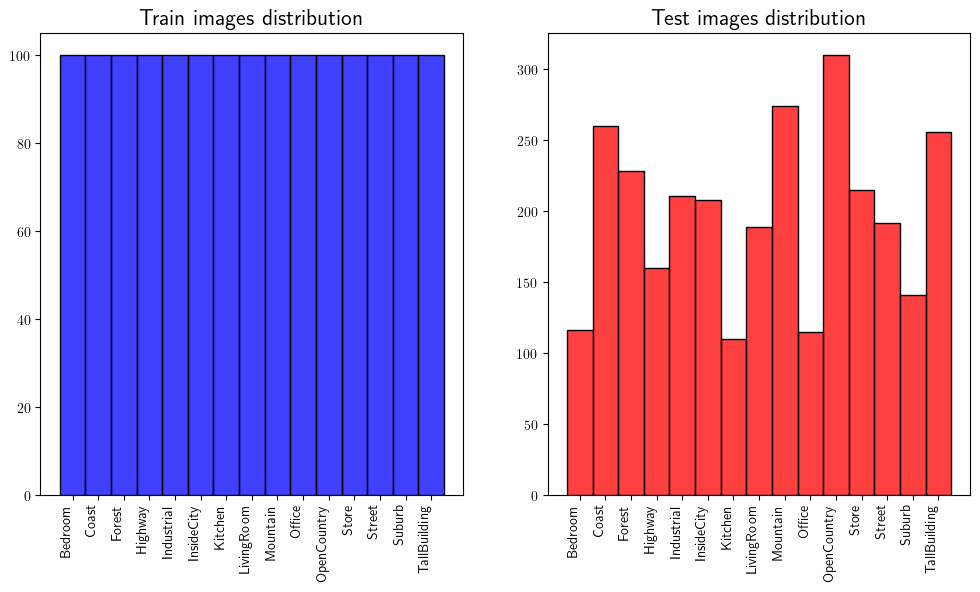

In [12]:
# Classes distribution plot
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(train_labels, bins=len(classes), ax=ax[0], color="blue", binrange=[0, len(classes)], binwidth=1)
ax[0].set_title("Train images distribution", fontsize=16)
ax[0].set_xticks([i + 0.5 for i in range(len(classes))])
ax[0].set_xticklabels(classes, rotation=90, ha='right')
ax[0].set_ylabel("")

sns.histplot(test_labels, bins=len(classes), ax=ax[1], color="red", binrange=[0, len(classes)], binwidth=1)
ax[1].set_title("Test images distribution", fontsize=16)
ax[1].set_xticks([i + 0.5 for i in range(len(classes))])
ax[1].set_xticklabels(classes, rotation=90, ha='right')
ax[1].set_ylabel("")

fig.savefig(os.path.join(IMAGE_DIR, "classes_distribution.pdf"), bbox_inches='tight')
plt.show()

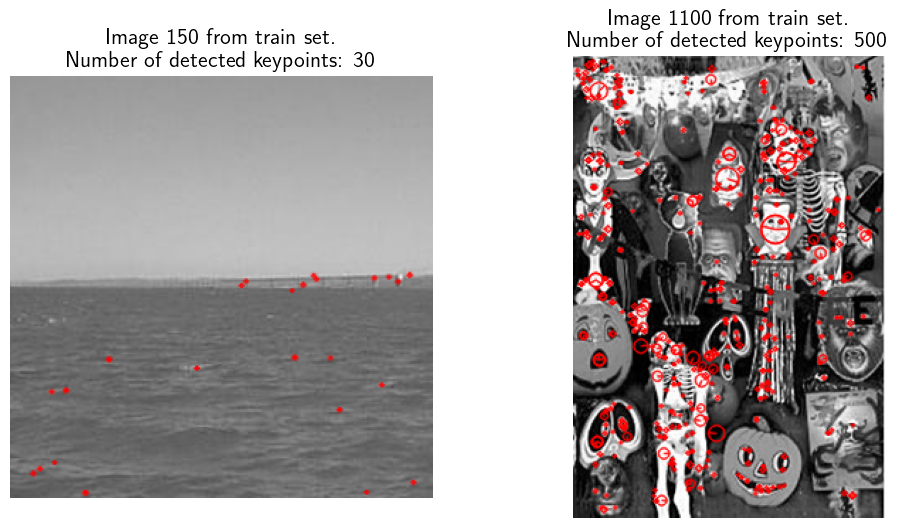

In [13]:
# Keypoints for 2 sample images
image1 = train_images[150]
image2 = train_images[1100]
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

# Draw keypoints on the images
image_keypoints1 = cv2.drawKeypoints(
    image1, 
	keypoints1, 
	outImage = None,
	color = (255, 0, 0),
	flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)
image_keypoints2 = cv2.drawKeypoints(
    image2,
	keypoints2,
	outImage = None,
	color = (255, 0, 0),
	flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(image_keypoints1)
ax[0].set_title(f"Image {150} from train set.\nNumber of detected keypoints: {len(keypoints1)}", fontsize=16)
ax[0].axis("off")
ax[1].imshow(image_keypoints2)
ax[1].set_title(f"Image {1100} from train set.\nNumber of detected keypoints: {len(keypoints2)}", fontsize=16)
ax[1].axis("off")

fig.savefig(os.path.join(IMAGE_DIR, "keypoints.pdf"), bbox_inches='tight')
plt.show()

In [14]:
# Silhouette analysis
k_values = np.arange(100, 1001, 50)
silhouette_scores1 = []
silhouette_scores2 = []
for k in tqdm.tqdm(k_values, desc="Computing silhouette scores", leave=False):
	kmeans1 = KMeans(n_clusters=k, random_state=42)
	kmeans2 = KMeans(n_clusters=k, random_state=42)
	cluster_labels1 = kmeans1.fit_predict(sample_descriptors1)
	cluster_labels2 = kmeans2.fit_predict(sample_descriptors2)
	silhouette_scores1.append(silhouette_score(sample_descriptors1, cluster_labels1))
	silhouette_scores2.append(silhouette_score(sample_descriptors2, cluster_labels2))

Computing silhouette scores:   0%|          | 0/19 [00:00<?, ?it/s]

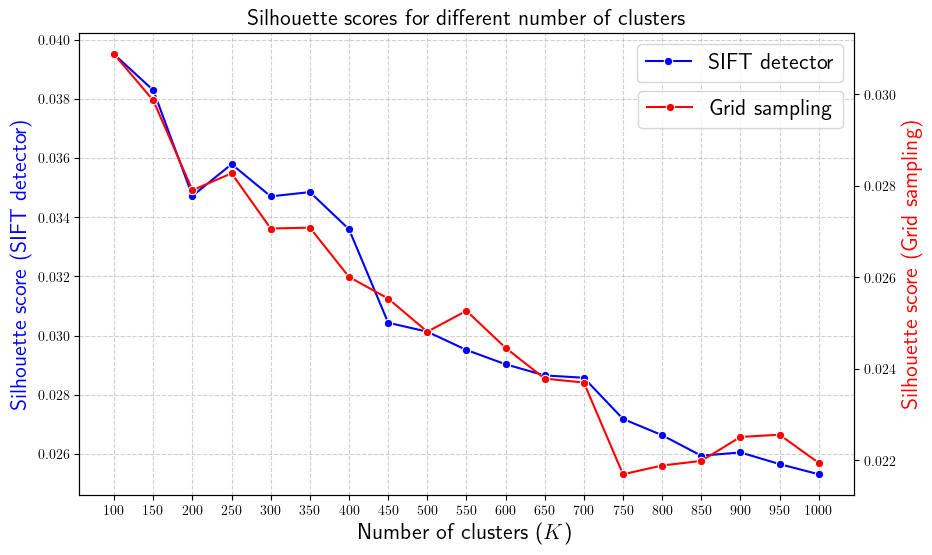

In [16]:
# Plot the silhouette scores
fig, ax1 = plt.subplots(figsize=(10, 6))

sns.lineplot(x=k_values, y=silhouette_scores1, marker="o", color="blue", ax=ax1, label="SIFT detector")

ax2 = ax1.twinx()
sns.lineplot(x=k_values, y=silhouette_scores2, marker="o", color="red", ax=ax2, label="Grid sampling")

ax1.set_title("Silhouette scores for different number of clusters", fontsize=16)
ax1.set_xlabel("Number of clusters" r" ($K$)", fontsize=16)
ax1.set_ylabel("Silhouette score (SIFT detector)", color="blue", fontsize=16)
ax2.set_ylabel("Silhouette score (Grid sampling)", color="red", fontsize=16)
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.legend(loc="upper right", fontsize=16)
ax2.legend(loc="upper right", bbox_to_anchor=(1, 0.9), fontsize=16)
ax1.set_xticks(k_values)

fig.savefig(os.path.join(IMAGE_DIR, "silhouette_scores_comparison.pdf"), bbox_inches='tight')
plt.show() 

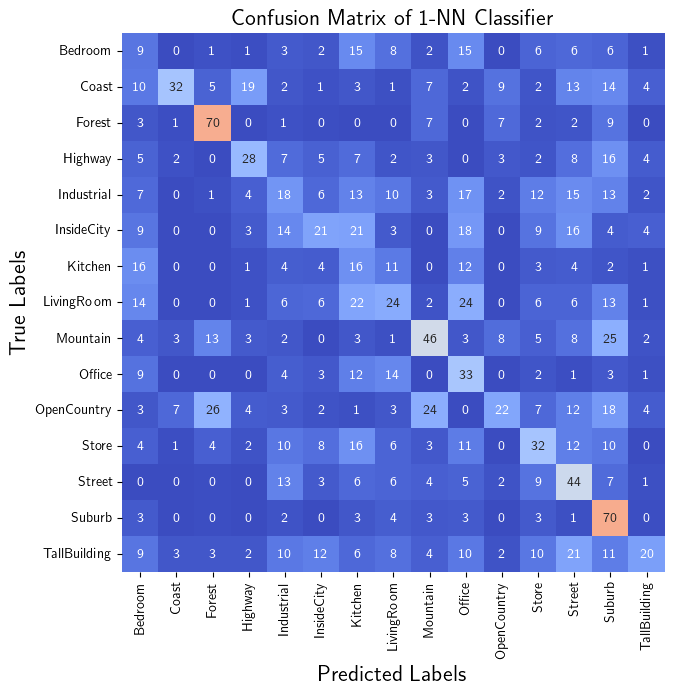

In [18]:
# KNN confusion matrix
conf_matrix = confusion_matrix(test_labels, one_knn_predictions2)
conf_matrix = conf_matrix / np.sum(conf_matrix, axis=1)

# Plot
fig = plt.figure(figsize=(7, 7))
sns.heatmap(
	conf_matrix * 100,
	annot=True, 
	fmt='.0f', 
	vmin = 0,
	vmax = 100,
	cmap='coolwarm', 
  cbar=False,
	xticklabels=classes, 
	yticklabels=classes
)
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title('Confusion Matrix of 1-NN Classifier', fontsize=16)

fig.savefig(os.path.join(IMAGE_DIR, "1nn_confusion_matrix.pdf"), bbox_inches='tight')
plt.show()

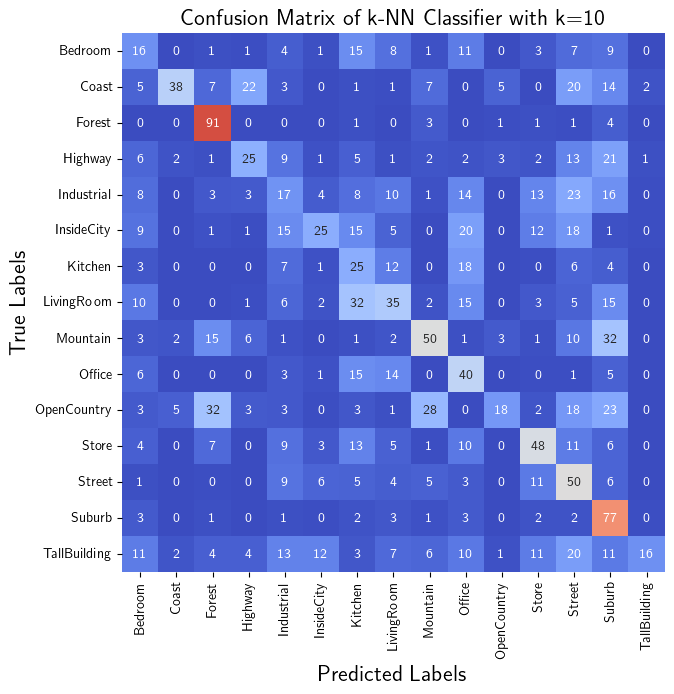

In [19]:
# KNN confusion matrix
predictions2 = knn2.predict(test_histograms2)
conf_matrix = confusion_matrix(test_labels, predictions2)
conf_matrix = conf_matrix / np.sum(conf_matrix, axis=1)

# Plot
fig = plt.figure(figsize=(7, 7))
sns.heatmap(
	conf_matrix * 100,
	annot=True, 
	fmt='.0f', 
	vmin = 0,
	vmax = 100,
	cmap='coolwarm', 
  cbar=False,
	xticklabels=classes, 
	yticklabels=classes
)
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title(f'Confusion Matrix of k-NN Classifier with k={best_k2}', fontsize=16)

fig.savefig(os.path.join(IMAGE_DIR, "knn_confusion_matrix.pdf"), bbox_inches='tight')
plt.show()


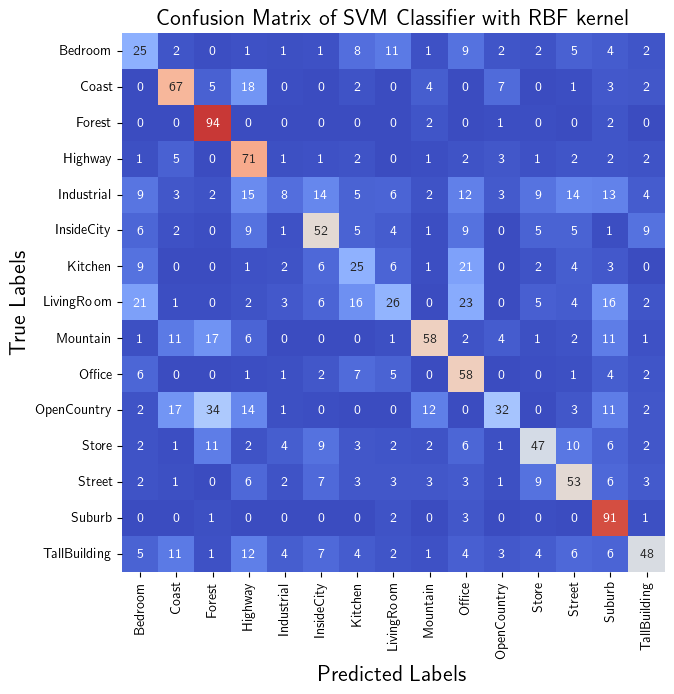

In [20]:
# SVM RBF confusion matrix
conf_matrix = confusion_matrix(test_labels, rbf_predictions2)
conf_matrix = conf_matrix / np.sum(conf_matrix, axis=1)

# Plot
fig = plt.figure(figsize=(7, 7))
sns.heatmap(
	conf_matrix * 100,
	annot=True, 
	fmt='.0f', 
	vmin = 0,
	vmax = 100,
	cmap='coolwarm', 
  cbar=False,
	xticklabels=classes, 
	yticklabels=classes
)
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title(f'Confusion Matrix of SVM Classifier with RBF kernel', fontsize=16)

fig.savefig(os.path.join(IMAGE_DIR, "svm_rbf_confusion_matrix.pdf"), bbox_inches='tight')
plt.show()

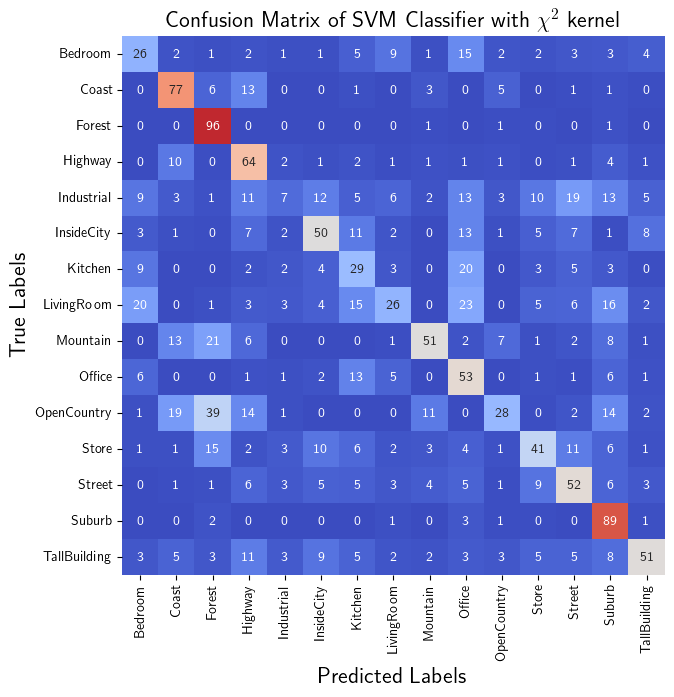

In [21]:
# SVM chi2 confusion matrix
conf_matrix = confusion_matrix(test_labels, chi_predictions2)
conf_matrix = conf_matrix / np.sum(conf_matrix, axis=1)

# Plot
fig = plt.figure(figsize=(7, 7))
sns.heatmap(
	conf_matrix * 100,
	annot=True, 
	fmt='.0f', 
	vmin = 0,
	vmax = 100,
	cmap='coolwarm', 
  cbar=False,
	xticklabels=classes, 
	yticklabels=classes
)
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title(f'Confusion Matrix of SVM Classifier with ' r'$\chi^2$' ' kernel', fontsize=16)

fig.savefig(os.path.join(IMAGE_DIR, "svm_chi2_confusion_matrix.pdf"), bbox_inches='tight')
plt.show()


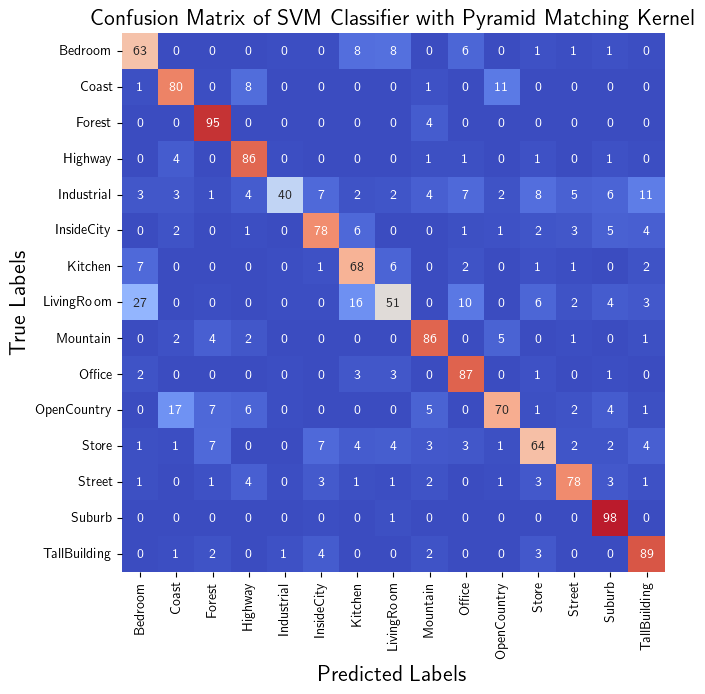

In [22]:
# SVM PMK confusion matrix
conf_matrix = confusion_matrix(test_labels, pmk_predictions)
conf_matrix = conf_matrix / np.sum(conf_matrix, axis=1)

# Plot
fig = plt.figure(figsize=(7, 7))
sns.heatmap(
	conf_matrix * 100,
	annot=True, 
	fmt='.0f', 
	vmin = 0,
	vmax = 100,
	cmap='coolwarm', 
  cbar=False,
	xticklabels=classes, 
	yticklabels=classes
)
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title(f'Confusion Matrix of SVM Classifier with Pyramid Matching Kernel', fontsize=16)

fig.savefig(os.path.join(IMAGE_DIR, "svm_pmk_confusion_matrix.pdf"), bbox_inches='tight')
plt.show()

